In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test, y_pred))

**Exploring** **Data**

In [0]:
data.info()
print("="*40)
print(data.head())

print("="*40)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 5 columns):
0    1202 non-null float64
1    1202 non-null float64
2    1202 non-null float64
3    1202 non-null float64
4    1202 non-null float64
dtypes: float64(5)
memory usage: 47.1 KB
        0     1       2     3         4
0  8000.0   4.0  0.2286  39.6  0.004738
1  6300.0   0.0  0.0508  55.5  0.000762
2   400.0   4.0  0.2286  55.5  0.004286
3  1250.0  15.4  0.0508  39.6  0.028259
4   800.0   7.3  0.2286  39.6  0.012348


In [0]:
print(data.iloc[0][0])

8000.0


***Looking at the statistical View of data***

In [0]:
print(data.describe().T)

    count         mean          std  ...          50%          75%           max
0  1202.0  2938.061564  3180.433353  ...  1600.000000  4000.000000  20000.000000
1  1202.0     6.657654     5.800597  ...     5.300000     9.900000     22.200000
2  1202.0     0.139996     0.094807  ...     0.101600     0.228600      0.304800
3  1202.0    50.829201    15.540260  ...    39.600000    71.300000     71.300000
4  1202.0     0.010967     0.013082  ...     0.004957     0.014072      0.058411

[5 rows x 8 columns]


***Checking for missing values in any feature***

In [0]:
data.isnull().sum()

#the output indicates that there are no null values in any feature of the data

0    0
1    0
2    0
3    0
4    0
dtype: int64

**Data Preprocessing : FEATURE SCALING is required.**

In [0]:
data_np = data.to_numpy()
labels = labels.to_numpy()

**Visualizing Data (each column with label class)**



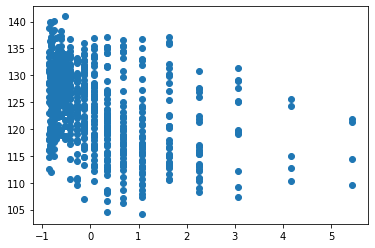

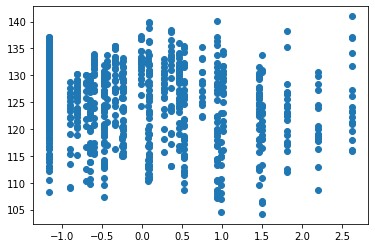

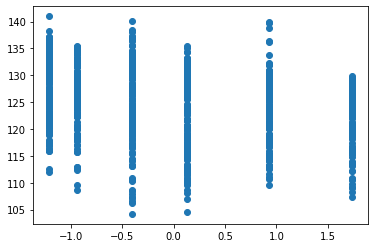

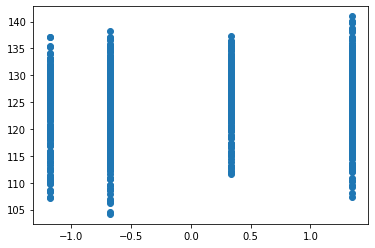

In [148]:
# y = std_data[:,-1]
# print(y.shape)
for i in range(4):
  plt.scatter(std_data[:,i],y_train)
  plt.show()

**MODEL** **CREATION**

In [0]:
# #add a column of ones in the input dataset
# one = np.ones(len(std_data))
# new_input = np.concatenate((one[:, np.newaxis], std_data), axis=1)


In [150]:
print(len(new_input[0]))

6


In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:

class AirFoil():
  def __init__(self):
    train_data = np.empty(2)
    labels = np.empty(1)
    theta = np.empty(1)

  def calculate_means(data):
    means = [0 for row in range(len(data[0]))]
    for i in range(len(data[0])):
      values = [x[i] for x in data]
      means[i] = sum(values)/(float(len(data)))

    return means

  
  def calculate_std(data, means):
    stddev = [0 for row in range(len(data[0]))]
    for i in range(len(data[0])):
      values = [pow(x[i]-means[i],2) for x in data]
      stddev[i] = math.sqrt((sum(values)/ float(len(data)-1)))
    return stddev

  def standardize_data(data,means,stddev):
    for row in data:
      for i in range(len(data[0])):
        row[i] = (row[i] - means[i])/stddev[i]
    return data

  def fit_values(self, X, thetas, y_train, alpha, max_iterations):
    X_transposed = X
    # max_iterations = 5000
    # alpha = 0.005
    threshold = 0.0001
    for i in range(max_iterations):
      diff = np.dot(X_transposed, thetas) - y_train
      cost = sum(diff**2)
      gradient = np.dot(diff, X_transposed)
      # print(gradient)
      value = (alpha*gradient)/float(len(X_transposed))
      # print(value)
      thetas = thetas - value

      # print(i," ",thetas)
    return thetas




  def train(self, path):
    data = pd.read_csv(path,header=None)
    labels_ = data.iloc[:,-1]
    data = data.iloc[:,:-1]
    # print(data.shape)
    self.train_data = data.to_numpy()
    self.labels = labels_.to_numpy()
    means = calculate_means(self.train_data)
    stddev = calculate_std(self.train_data,means)
    self.train_data = standardize_data(self.train_data,means,stddev)
    # print(self.train_data)
    #add a column of ones in the input dataset
    one = np.ones(len(self.train_data))
    new_input = np.concatenate((one[:, np.newaxis], self.train_data), axis=1)
    self.train_data = new_input
    # print("no of columns = " ,len(new_input[0]))
    
    '''alpha = 0.005
    max_iterations = 5000
    self.theta = self.fit_values(new_input, thetas,alpha, max_iterations)
    print(self.theta)'''
    X_train = self.train_data[:800,:]
    y_train = self.labels[:800]
    X_test = self.train_data[800:,:]
    y_test = self.labels[800:]

    print("For different Theta values")
    mse_error = []
    mse_error_theta = []
    print("for theta = 0")
    iterations = [50,100,200,300,400,500,800,1000]
    for i in iterations :
      thetas = np.array([0,0,0,0,0,0])
      self.theta = self.fit_values(X_train, thetas, y_train, 0.005, i)
      # print(self.theta)
      y_pred = self.predict_values(X_test)
      # print("predicted values")
      # print(y_pred)
      val = mean_squared_error(y_test, y_pred)
      print("for iteration i ",i," ",val)
      mse_error_theta.append(val)
      print(r2_score(y_test, y_pred))
    mse_error.append(mse_error_theta)

    print("theta  = 50")
    mse_error_theta = []
    for i in iterations :
      thetas = np.array([50,50,50,50,50,50])
      self.theta = self.fit_values(X_train, thetas, y_train, 0.005, i)
      # print(self.theta)
      y_pred = self.predict_values(X_test)
      # print("predicted values")
      # print(y_pred)
      val = mean_squared_error(y_test, y_pred)
      print("for iteration i ",i," ",val)
      mse_error_theta.append(val)
      print(r2_score(y_test, y_pred))
    mse_error.append(mse_error_theta)

    print("theta  = 100")
    mse_error_theta = []
    for i in iterations :
      thetas = np.array([100,100,100,100,100,100])
      self.theta = self.fit_values(X_train, thetas, y_train, 0.005, i)
      # print(self.theta)
      y_pred = self.predict_values(X_test)
      # print("predicted values")
      # print(y_pred)
      val = mean_squared_error(y_test, y_pred)
      print("for iteration i ",i," ",val)
      mse_error_theta.append(val)
      print(r2_score(y_test, y_pred))
    mse_error.append(mse_error_theta)

    plt.plot(iterations,mse_error[0], linewidth = 2, markersize = 12 )
    plt.plot(iterations,mse_error[1], linewidth = 2, markersize = 12 )
    plt.plot(iterations,mse_error[2], linewidth = 2, markersize = 12 )



    print("For different values of alpha")
    iterations_lr = [50,100,200,300,400,500,800,1000]
    alpha = [0.1, 0.01, 0.005]
    mse_error_alpha = []
    for i in alpha:
      # print("alpha = ",i)
      mse_error_iter = []
      for j in iterations_lr:
        thetas = np.array([0,0,0,0,0,0])
        self.theta = self.fit_values(X_train, thetas, y_train, i, j)
        # print(self.theta)
        y_pred = self.predict_values(X_test)
        # print("predicted values")
        # print(y_pred)
        val = mean_squared_error(y_test, y_pred)
        # print("for iteration i ",j," ",val)
        mse_error_iter.append(val)
        print(r2_score(y_test, y_pred))
        print("MSE  = ", val)
      mse_error_alpha.append(mse_error_iter)

    # print(mse_error_alpha)

    
    plt.plot(iterations_lr,mse_error_alpha[0], linewidth = 2, markersize = 12 )
    plt.plot(iterations_lr,mse_error_alpha[1], linewidth = 2, markersize = 12 )
    plt.plot(iterations_lr,mse_error_alpha[2], linewidth = 2, markersize = 12 )
    plt.show()




  def predict_values(self,X):
      # X_test = pd.read_csv(path, header = None)
      # X = X_test
      #add a column of ones in the input dataset
      # print("no of cols in test data = ", len(X[0]))
      # one = np.ones(len(X))
      
      # std_data_1 = standardize_data(X,means,stddev)
      # new_input = np.concatenate((one[:, np.newaxis], std_data_1), axis=1)
      # print(len(std_data_1[0]))
      # print(len(theta))
      y_pred = np.dot(X, self.theta)
      return y_pred

  def predict(path):
    X_test = pd.read_csv(path, header = None)
    X = X_test
    #add a column of ones in the input dataset
    # print("no of cols = ", len(X[0]))
    one = np.ones(len(X))
    
    std_data_1 = standardize_data(X,means,stddev)
    new_input = np.concatenate((one[:, np.newaxis], std_data_1), axis=1)
    y_pred = np.dot(new_input, self.theta)
    return y_pred




For different Theta values
for theta = 0
for iteration i  50   9543.212381110507
-203.04589768162268
for iteration i  100   5821.009641162281
-123.46051604125817
for iteration i  200   2177.2290010365705
-45.55189764552567
for iteration i  300   825.2444260358563
-16.644764990302683
for iteration i  400   322.3841457087743
-5.892978986790107
for iteration i  500   134.80890551782065
-1.8823841536113712
for iteration i  800   28.221900238547377
0.3965802354085828
for iteration i  1000   22.968461686731015
0.5089053668645669
theta  = 50
for iteration i  50   10922.608168088154
-232.53911656557148
for iteration i  100   6907.290753511255
-146.68657408671953
for iteration i  200   2938.1476724256636
-61.821297001408794
for iteration i  300   1333.662021928667
-27.51537339847573
for iteration i  400   644.7959405844381
-12.786549147584605
for iteration i  500   335.2110942437284
-6.167235298376678
for iteration i  800   82.87966842097751
-0.7720716743124281
for iteration i  1000   51.728315

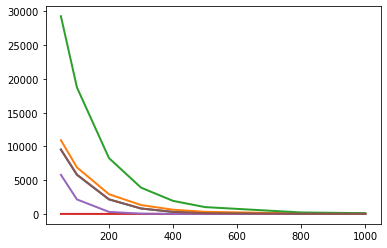

In [247]:
af = AirFoil()
# values = pd.read_csv("/gdrive/My Drive/smai/assignment2/Datasets/Question-3/airfoil.csv", header = None)
# print(values.shape)
af.train("/gdrive/My Drive/smai/assignment2/Datasets/Question-3/airfoil.csv")
# y_pred = af.predict("/gdrive/My Drive/smai/assignment2/Datasets/Question-3/test.csv")


What Should be done in Following Scenarios:

1. When 0-0.5% of values are missing of that feature
Soln: Replace the missing values with either the mean or mode values

2. When 8-10% of values are missing of that feature
Soln: Check if the feature is important or not using the correlation matrix and accordingly decide whether to replace the missing values with respective means or modes or drop the columns

3. When 60-70% of values are missing of that feature
Soln: If the missing values is greater than 50%, drop that feature